# [OpenAi completion/ai function](../openai_cli/completion/functions/root.py)

In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions.root import ai_function
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.93.1.


In [2]:
input_image = file.load_image(
    os.path.join(
        os.getenv("HOME",""),
        "git/blue-bracket/images/portal-34.jpg")
        )[1]

In [3]:
func = ai_function(
    inputs = ["an image as a numpy array"],
    returns = ["a darker version of the input image as a numpy array"],
    requirements = [
        "does not run a for loop on the pixels",
        "uses numpy vector functions",
        "imports all modules that are used in the code"
    ],
    output_class_name="ndarray",
    verbose=False,
)

ai_function.prompt=Write a python function named ai_function_47883836
that inputs an image as a numpy array
and does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code
and returns a darker version of the input image as a numpy array.


In [4]:
assert func.generate(validation_input = input_image)

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=5698 request_id=bb209a5ce848f8e341523b0d8d5d7bf9 response_code=200
openai-cli.complete(): finish_reason: stop.
code: 

import numpy as np
from PIL import Image

def ai_function_47883836(img):
    """Function takes a numpy array of an image and outputs a darker version as a numpy array"""

    dark_img = np.ones(img.shape)*0.5 * img
    
    return dark_img
ai_function.compute(ndarray)
-> ndarray


In [5]:

image_output = func.compute(input_image)
assert image_output is not None

ai_function.compute(ndarray)
-> ndarray


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


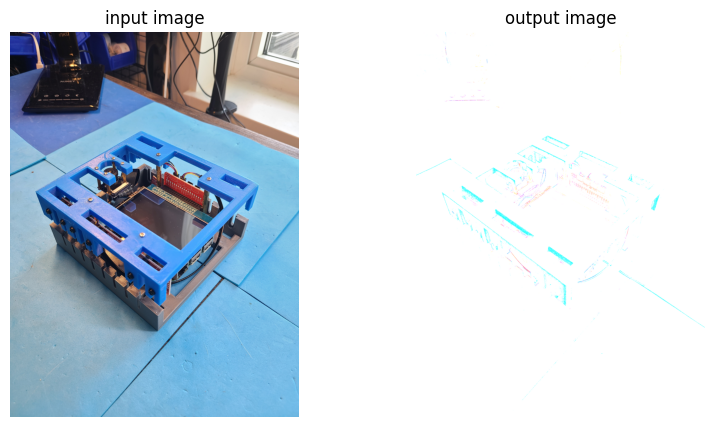

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [7]:
# END